<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/12(sat)_nov_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename='/content/drive/MyDrive/machine_learning/123_Raman_DATA_csv.csv'
import pandas as pd
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,모델 포함,Y_1,Y_2,Y_3,100,101,102,103,104,...,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425
0,1,True,0.152,0.554,0.706,146639.0,148544.0,150764.0,153224.0,155800.0,...,334369.0,336153.0,334933.0,333409.0,334084.0,335164.0,333873.0,331936.0,333974.0,338195.0
1,2,True,0.079,1.406,1.485,206566.0,209838.0,213493.0,217388.0,221327.0,...,294614.0,294377.0,291739.0,293169.0,296291.0,296085.0,293815.0,290288.0,287718.0,289398.0
2,3,True,0.100,2.243,2.343,218727.0,225835.0,232885.0,239820.0,246478.0,...,79871.5,76713.4,74038.4,73694.4,72858.8,69432.9,66287.1,64690.1,64200.5,65122.9
3,4,True,0.238,3.225,3.463,295718.0,303733.0,311632.0,319355.0,326706.0,...,103212.0,99360.4,95507.3,96183.6,97782.4,96121.2,93317.4,91037.1,89635.4,90149.7
4,5,True,0.415,3.744,4.159,326139.0,334950.0,343489.0,351643.0,359265.0,...,122042.0,119156.0,116189.0,117152.0,118201.0,116130.0,113295.0,110994.0,109691.0,109699.0


In [4]:
len(data)

404

In [5]:
data['Y_1']

0       0.152
1       0.079
2       0.100
3       0.238
4       0.415
        ...  
399    11.800
400    11.800
401    11.800
402    11.200
403    11.200
Name: Y_1, Length: 404, dtype: float64

In [6]:
data1=data.iloc[0::,5:3331]

In [7]:
data1.head()

,100,101,102,103,104,105,106,107,108,109,...,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425
0,146639.0,148544.0,150764.0,153224.0,155800.0,158297.0,160498.0,162250.0,163542.0,164511.0,...,334369.0,336153.0,334933.0,333409.0,334084.0,335164.0,333873.0,331936.0,333974.0,338195.0
1,206566.0,209838.0,213493.0,217388.0,221327.0,225052.0,228310.0,230962.0,233047.0,234760.0,...,294614.0,294377.0,291739.0,293169.0,296291.0,296085.0,293815.0,290288.0,287718.0,289398.0
2,218727.0,225835.0,232885.0,239820.0,246478.0,252605.0,257958.0,262420.0,266083.0,269223.0,...,79871.5,76713.4,74038.4,73694.4,72858.8,69432.9,66287.1,64690.1,64200.5,65122.9
3,295718.0,303733.0,311632.0,319355.0,326706.0,333419.0,339271.0,344191.0,348322.0,351983.0,...,103212.0,99360.4,95507.3,96183.6,97782.4,96121.2,93317.4,91037.1,89635.4,90149.7
4,326139.0,334950.0,343489.0,351643.0,359265.0,366171.0,372196.0,377278.0,381526.0,385220.0,...,122042.0,119156.0,116189.0,117152.0,118201.0,116130.0,113295.0,110994.0,109691.0,109699.0


In [8]:
data1_n=data1.to_numpy()
raman=data1_n

In [9]:
data2=data.iloc[0::,2:3]

In [10]:
data2.head()

,Y_1
0,0.152
1,0.079
2,0.100
3,0.238
4,0.415


In [11]:
data2_n=data2.to_numpy().flatten()
data2_n
raman_target=data2_n              

In [12]:
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 

plt.rc('font',family='Malgun Gothic')

In [13]:
raman

array([[ 146639. ,  148544. ,  150764. , ...,  331936. ,  333974. ,
         338195. ],
       [ 206566. ,  209838. ,  213493. , ...,  290288. ,  287718. ,
         289398. ],
       [ 218727. ,  225835. ,  232885. , ...,   64690.1,   64200.5,
          65122.9],
       ...,
       [ 484818. ,  486237. ,  485386. , ..., 1050000. , 1050000. ,
        1060000. ],
       [ 484521. ,  486353. ,  485478. , ..., 1050000. , 1060000. ,
        1070000. ],
       [ 486090. ,  488018. ,  487383. , ..., 1050000. , 1060000. ,
        1060000. ]])

In [14]:
raman_target

array([ 0.152,  0.079,  0.1  ,  0.238,  0.415,  1.025,  1.866,  3.841,
        5.134,  5.853,  7.601,  8.498, 10.464, 10.86 , 11.813,  0.   ,
        0.15 ,  0.32 ,  0.99 ,  1.35 ,  2.92 ,  4.85 ,  6.29 ,  8.21 ,
        8.94 , 10.11 , 10.59 , 12.13 ,  0.   ,  0.   ,  0.   ,  0.35 ,
        0.35 ,  0.35 ,  0.73 ,  0.73 ,  0.73 ,  1.06 ,  1.06 ,  1.06 ,
        1.67 ,  1.67 ,  1.67 ,  2.38 ,  2.38 ,  2.38 ,  3.64 ,  3.64 ,
        3.64 ,  3.65 ,  3.65 ,  3.65 ,  5.18 ,  5.18 ,  5.18 ,  6.76 ,
        6.76 ,  6.76 ,  8.25 ,  8.25 ,  8.25 ,  8.94 ,  8.94 ,  8.94 ,
        9.74 ,  9.74 ,  9.74 , 10.56 , 10.56 , 10.56 , 11.81 , 11.81 ,
       11.81 , 13.6  , 13.6  , 13.6  , 13.03 , 13.03 , 13.03 ,  0.08 ,
        0.08 ,  0.08 ,  0.15 ,  0.15 ,  0.15 ,  0.07 ,  0.07 ,  0.07 ,
        0.26 ,  0.26 ,  0.26 ,  0.24 ,  0.24 ,  0.24 ,  0.4  ,  0.4  ,
        0.4  ,  0.81 ,  0.81 ,  0.81 ,  1.54 ,  1.54 ,  1.54 ,  2.51 ,
        2.51 ,  2.51 ,  4.01 ,  4.01 ,  4.01 ,  4.58 ,  4.58 ,  4.58 ,
      

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [18]:
base_model= make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model=BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [19]:
cross_val=cross_validate(
    estimator=base_model,
#    X=boston.data, y=boston.target,
     X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02768712043762207 (+/-0.004055884802190717)
avg score time: 0.015170049667358399 (+/- 0.002636740078925363)
avg test score: 0.5740727514143357 (+/- 0.27952500885256626)


In [20]:
cross_val=cross_validate(
    estimator=bagging_model,
     X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11878347396850586 (+/-0.013478807424175144)
avg score time: 0.07769017219543457 (+/- 0.011819338781569965)
avg test score: 0.6658647218633978 (+/- 0.23996144357675644)


In [21]:
base_model= make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model=BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [22]:
cross_val=cross_validate(
    estimator=bagging_model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12417111396789551 (+/-0.014317871558970567)
avg score time: 0.06409645080566406 (+/- 0.0016540437207974935)
avg test score: 0.6657767984943204 (+/- 0.2402330409047042)


SVR

In [23]:
base_model= make_pipeline(
    StandardScaler(),
    SVR()
)

In [24]:
cross_val=cross_validate(
    estimator=base_model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14591312408447266 (+/-0.0070695790044159)
avg score time: 0.06264925003051758 (+/- 0.0030312463849696577)
avg test score: 0.5604745651849912 (+/- 0.4541906065937921)


In [25]:
cross_val=cross_validate(
    estimator=bagging_model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1237673282623291 (+/-0.014145082551920304)
avg score time: 0.06984529495239258 (+/- 0.0038835230664573347)
avg test score: 0.67476281721389 (+/- 0.24830570483991554)


Decision tree

In [26]:
base_model= make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model=BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val=cross_validate(
    estimator=base_model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.45205936431884763 (+/-0.01121096628921252)
avg score time: 0.00355381965637207 (+/- 9.937009514669515e-05)
avg test score: 0.42502270033823286 (+/- 0.2956093805154763)


In [28]:
cross_val=cross_validate(
    estimator=bagging_model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.9337284564971924 (+/-0.01262314969389126)
avg score time: 0.02093348503112793 (+/- 0.0006335079568727963)
avg test score: 0.5807721499411755 (+/- 0.24739939934473967)


#Forests of randomized tress
##1) Random Forest
##2) Extra-tree

In [29]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

In [30]:
model =make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

##Random Forest

In [31]:
model =make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [32]:
cross_val=cross_validate(
    estimator=model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 25.452041721343996 (+/-1.1962236002474549)
avg score time: 0.015848684310913085 (+/- 0.0008109903401597354)
avg test score: 0.626265962516243 (+/- 0.17139403642082124)


In [33]:
cross_val=cross_validate(
    estimator=model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 27.13924560546875 (+/-1.6074431970074308)
avg score time: 0.018203926086425782 (+/- 0.005534435391590829)
avg test score: 0.6234840905829264 (+/- 0.18641948231094738)


#Extremely Randomized Trees

In [34]:
model =make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [35]:
cross_val=cross_validate(
    estimator=model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 10.942065763473511 (+/-1.8596357011194786)
avg score time: 0.01613144874572754 (+/- 0.00038478103768280225)
avg test score: 0.6486511460537903 (+/- 0.2740088478964827)


#Random Forest, EXtra Trees

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [38]:
n_classes=3
n_estimators=30
cmap=plt.cm.RdYlBu
plot_step=0.2
plot_step_coarser=0.5
RANDOM_SEED=13

In [39]:
plot_idx=1
models=[DecisionTreeRegressor(max_depth=None),
        RandomForestRegressor(n_estimators=n_estimators),
        ExtraTreesRegressor(n_estimators=n_estimators)]

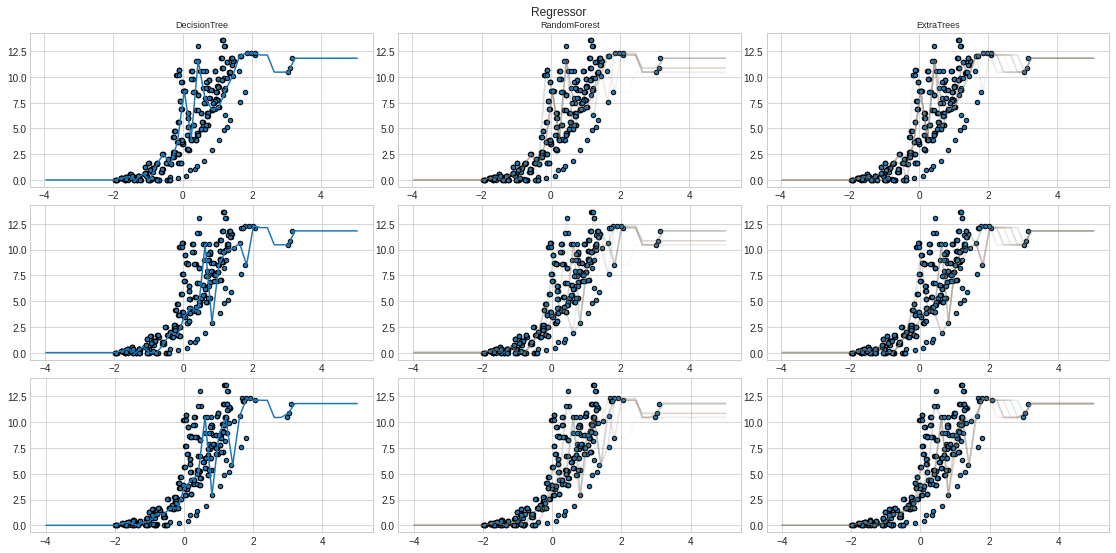

In [41]:
plt.figure(figsize=(16,8))
for pair in (0,1,2):
    for model in models:
        X=raman[:,pair]
        y=raman_target

        idx=np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X =X[idx]
        y =y[idx]
        mean=X.mean(axis=0)
        std = X.std(axis=0)
        X=(X-mean)/std
        model.fit(X.reshape(-1,1), y)
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

        plt.subplot(3,3,plot_idx)
        if plot_idx <=len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max =X.min()-1,X.max()+1
        y_min, y_max =y.min()-1,y.max()+1
        xx,yy = np.arange(x_min-1,x_max+1,plot_step), np.arange(y_min-1,y_max+1,plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx,Z)
        else:
            estimator_alpha =1.0/len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs = plt.plot(xx,Z,alpha=estimator_alpha)
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx +=1
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.5,w_pad=0.25, pad=2.5)
plt.show()

In [42]:
plot_idx=1
#models=[DecisionTreeRegressor(max_depth=None)]
       # RandomForestRegressor(n_estimators=n_estimators),
models=[ExtraTreesRegressor(n_estimators=n_estimators)]

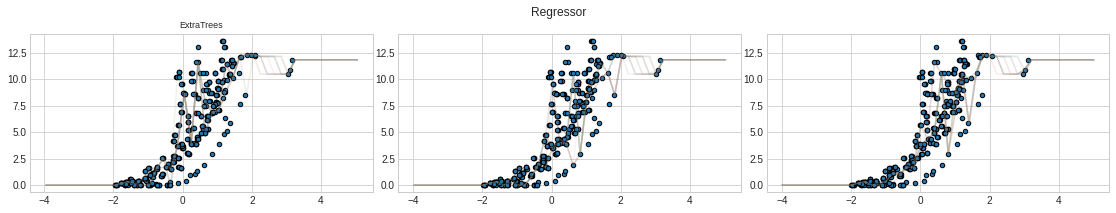

In [43]:
plt.figure(figsize=(16,8))
for pair in (0,1,2):
    for model in models:
        X=raman[:,pair]
        y=raman_target

        idx=np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X =X[idx]
        y =y[idx]
        mean=X.mean(axis=0)
        std = X.std(axis=0)
        X=(X-mean)/std
        model.fit(X.reshape(-1,1), y)
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

        plt.subplot(3,3,plot_idx)
        if plot_idx <=len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max =X.min()-1,X.max()+1
        y_min, y_max =y.min()-1,y.max()+1
        xx,yy = np.arange(x_min-1,x_max+1,plot_step), np.arange(y_min-1,y_max+1,plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx,Z)
        else:
            estimator_alpha =1.0/len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs = plt.plot(xx,Z,alpha=estimator_alpha)
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx +=1
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.5,w_pad=0.25, pad=2.5)
plt.show()

In [44]:
plot_idx=1
#models=[DecisionTreeRegressor(max_depth=None)]
models=[RandomForestRegressor(n_estimators=n_estimators)]
       # ExtraTreesRegressor(n_estimators=n_estimators)]

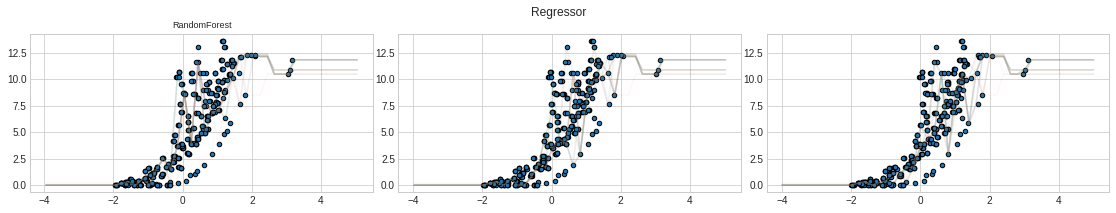

In [45]:
plt.figure(figsize=(16,8))
for pair in (0,1,2):
    for model in models:
        X=raman[:,pair]
        y=raman_target

        idx=np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X =X[idx]
        y =y[idx]
        mean=X.mean(axis=0)
        std = X.std(axis=0)
        X=(X-mean)/std
        model.fit(X.reshape(-1,1), y)
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

        plt.subplot(3,3,plot_idx)
        if plot_idx <=len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max =X.min()-1,X.max()+1
        y_min, y_max =y.min()-1,y.max()+1
        xx,yy = np.arange(x_min-1,x_max+1,plot_step), np.arange(y_min-1,y_max+1,plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx,Z)
        else:
            estimator_alpha =1.0/len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs = plt.plot(xx,Z,alpha=estimator_alpha)
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx +=1
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.5,w_pad=0.25, pad=2.5)
plt.show()

In [46]:
plot_idx=1
#models=[DecisionTreeRegressor(max_depth=None)]
models=[RandomForestRegressor(n_estimators=3)]
       # ExtraTreesRegressor(n_estimators=n_estimators)]

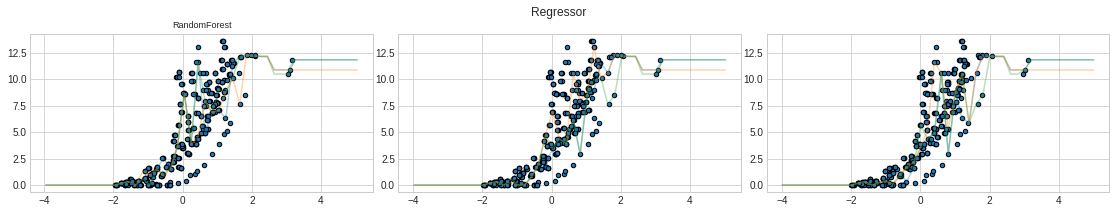

In [47]:
plt.figure(figsize=(16,8))
for pair in (0,1,2):
    for model in models:
        X=raman[:,pair]
        y=raman_target

        idx=np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X =X[idx]
        y =y[idx]
        mean=X.mean(axis=0)
        std = X.std(axis=0)
        X=(X-mean)/std
        model.fit(X.reshape(-1,1), y)
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

        plt.subplot(3,3,plot_idx)
        if plot_idx <=len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max =X.min()-1,X.max()+1
        y_min, y_max =y.min()-1,y.max()+1
        xx,yy = np.arange(x_min-1,x_max+1,plot_step), np.arange(y_min-1,y_max+1,plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1,1))
            cs = plt.plot(xx,Z)
        else:
            estimator_alpha =1.0/len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1,1))
                cs = plt.plot(xx,Z,alpha=estimator_alpha)
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx +=1
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.5,w_pad=0.25, pad=2.5)
plt.show()

#AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [49]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [50]:
cross_val=cross_validate(
    estimator=model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 8.108764219284058 (+/-0.6237378343253536)
avg score time: 0.03409543037414551 (+/- 0.004582065495263677)
avg test score: 0.7835487733755533 (+/- 0.10089323978121617)


#Gradient Tree Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [54]:
cross_val=cross_validate(
    estimator=model,
    X=raman, y=raman_target,
    cv=5)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 24.791297054290773 (+/-2.7768140555550977)
avg score time: 0.0041291236877441405 (+/- 0.00033180957519052826)
avg test score: 0.7358375541426068 (+/- 0.08731289654122744)


#Voting Classifier

In [55]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [57]:
model1=SVC()
model2=GaussianNB()
model3=RandomForestClassifier()
vote_model=VotingClassifier(
    estimators=[('svc', model1), ('naive', model2),('forest', model3)],
    voting='hard'
)

#결정 시각화

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [60]:
model1=LinearRegression()
model2=GradientBoostingRegressor()
model3=RandomForestRegressor()
vote_model =VotingRegressor(estimators=[('linear',model1),('gbr',model2),('rfr',model3)],
                              weights=[1,1,1])

In [61]:
for model in [model1,model2,model3,vote_model]:
    model_name=str(type(model)).split('.')[-1][:-2]
    scores=cross_val_score(model,raman,raman_target,cv=5)
    print('R2: %0.2f (+/- %0.2f) [%s]' % ( scores.mean(), scores.std(), model_name))

R2: 0.77 (+/- 0.26) [LinearRegression]
R2: 0.73 (+/- 0.09) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.17) [RandomForestRegressor]
R2: 0.78 (+/- 0.12) [VotingRegressor]


In [63]:
XX=raman[:,0].reshape(-1,1)

In [64]:
y=raman_target

In [68]:
model1=LinearRegression()
model2=GradientBoostingRegressor()
model3=RandomForestRegressor()
vote_model =VotingRegressor(estimators=[('linear',model1),('gbr',model2),('rfr',model3)],
                              weights=[1,1,1])

model1=model1.fit(XX,y)
model2=model2.fit(XX,y)
model3=model3.fit(XX,y)
vote_model=vote_model.fit(XX,y)